# Implement a Neural Network

This notebook contains useful information and testing code to help you to develop a neural network by implementing the forward pass and backpropagation algorithm in the `models/neural_net.py` file. 

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from models.neural_net import NeuralNetwork

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """Returns relative error"""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You will implement your network in the class `NeuralNetwork` inside the file `models/neural_net.py` to represent instances of the network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays.

The cell below initializes a toy dataset and corresponding model which will allow you to check your forward and backward pass by using a numeric gradient check.

In [19]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5


def init_toy_model(num_layers):
    np.random.seed(0)
    hidden_sizes = [hidden_size] * (num_layers - 1)
    return NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

def init_toy_data():
    np.random.seed(0)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.random.randint(num_classes, size=num_inputs)
    return X, y

# Implement forward and backward pass

The first thing you will do is implement the forward pass of your neural network along with the loss calculation. The forward pass should be implemented in the `forward` function. You can use helper functions like `linear`, `relu`, and `softmax` to help organize your code.

Next, you will implement the backward pass using the backpropagation algorithm. Backpropagation will compute the gradient of the loss with respect to the model parameters `W1`, `b1`, ... etc. Use a softmax fuction with cross entropy loss for loss calcuation. Fill in the code blocks in `NeuralNetwork.backward`. 

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers you trained. This should be similar to the training procedure you used for the SVM and Softmax classifiers.

Once you have implemented SGD, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2 using a two-layer network with relu activation.

In [21]:
# Hyperparameters
epochs = 100
batch_size = 1
learning_rate = 1e-2
learning_rate_decay = 0.95
regularization = 5e-6

# Initialize a new neural network model
net = init_toy_model(2)

# Variables to store performance for each epoch
train_loss = np.zeros(epochs)
train_accuracy = np.zeros(epochs)

X,y = init_toy_data()
# For each epoch...
for epoch in range(epochs):        
    # Training
    # Run the forward pass of the model to get a prediction and compute the accuracy
    # Run the backward pass of the model to update the weights and compute the loss
    Out1 = net.forward(X)
    loss = net.backward(X,y,learning_rate)
    train_loss[epoch] += loss 
    train_accuracy[epoch] += 0

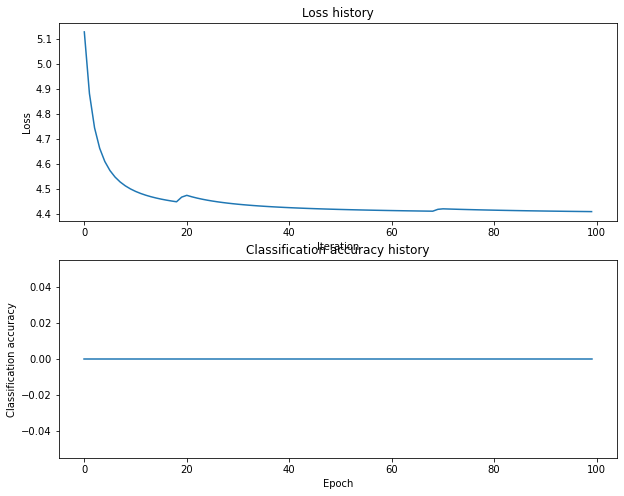

In [17]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy)
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.show()

In [50]:
Out1

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [51]:
X

array([[17.64052346,  4.00157208,  9.78737984, 22.40893199],
       [18.6755799 , -9.7727788 ,  9.50088418, -1.51357208],
       [-1.03218852,  4.10598502,  1.44043571, 14.54273507],
       [ 7.61037725,  1.21675016,  4.43863233,  3.33674327],
       [14.94079073, -2.05158264,  3.13067702, -8.54095739]])

In [52]:
y

array([1, 1, 0, 2, 0])

In [53]:
Out1

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [54]:
loss

5.493061443340549

In [55]:
net.gradients["W1"]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [56]:
net.params["W1"]

array([[ -2.03082496,  -2.66254875,  -4.28262599,  -5.85400306,
        -11.98484301,  -0.47543922,  -4.60803227,  -1.96511951,
         -2.14476525,  -5.05967577],
       [  0.3674898 ,  -0.11045666,   1.33512138,   1.12479888,
          2.04679676,   0.11432945,  -0.73258177,  -0.88535895,
          0.56763298,   0.93962822],
       [ -2.43337818,  -1.34520274,  -1.5587139 ,  -3.43152991,
         -4.87557169,  -0.74560326,  -3.01728561,  -1.31020783,
         -0.2039672 ,  -1.67499931],
       [ -0.34123863,  -3.86506493,  -0.61042241,  -2.94031673,
         -4.0932647 ,  -0.10779933,  -6.92952207,  -3.05298865,
         -0.59377489,  -0.68503246]])

In [4]:
X

array([[17.64052346,  4.00157208,  9.78737984, 22.40893199],
       [18.6755799 , -9.7727788 ,  9.50088418, -1.51357208],
       [-1.03218852,  4.10598502,  1.44043571, 14.54273507],
       [ 7.61037725,  1.21675016,  4.43863233,  3.33674327],
       [14.94079073, -2.05158264,  3.13067702, -8.54095739]])

In [5]:
y

array([1, 1, 0, 2, 0])

In [8]:
X@net.params["W1"]+net.params["b1"]

array([[  5.0901664 ,  13.87489727,   4.43851633,  -5.81698195,
         24.56973111, -13.31764368,  25.37803916,  10.81051643,
          2.87712024,   5.71616873],
       [  3.52340497,  -0.55077352,  10.198841  ,  18.30386565,
         26.31560859, -17.78328089,   0.8573803 ,  -2.21000898,
          5.08089576,  15.21640918],
       [ -1.32672609,   5.99960023,  -4.77555038, -15.84433385,
         -0.94766736,   1.27880909,  11.55584978,   8.26505885,
         -1.01646438,  -3.10525567],
       [  1.39280277,   4.48891936,   4.6245797 ,   3.64924189,
         11.83330212,  -6.48257659,   6.67836081,   0.88984039,
          2.553212  ,   3.79941252],
       [  8.37241688,   0.90575079,  11.6752992 ,  23.91275463,
         18.53477124, -10.58719191,   0.3826202 ,  -6.34799224,
          2.96116149,   7.53447846]])

In [10]:
net.forward(X)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.48086528, 0.25956736, 0.25956736],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [11]:
np.sum(net.forward(X),axis=1)

array([1., 1., 1., 1., 1.])